# **ANALISIS EXPLORATORIO DE DATOS Y CREACION DE MODELO DE CLASIFICACION DEL IMPACTO SOBRE (INCLUSION DIGITAL EN LAS ESCUELAS PUBLICAS DE BOLIVIA)**

## **ENTENDIMIENTO DE LOS DATOS**

### **RECOLECCION DE DATOS**

**PASO 1: CONFIGURACION INICIAL**

In [1]:
#Importa las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Acceder al archivo en tu unidad de Google Drive
ruta_archivo = '/content/drive/MyDrive/profesores_final.xlsx'

Mounted at /content/drive


In [3]:
#creaion del DataFrame
df = pd.read_excel(ruta_archivo)

**PASO 2: EXPLORACION INICIAL DE DATOS**

In [4]:
#Muestra los primeros registros del DataFrame
df.head()

,Sexo,Edad,Departamento,Ciudad,Colegio,Años de experiencia,Tiempo en el colegio,Años en el Colegio,Normalista,Tecnico,...,Material de clases de Internet,Material de clases de elaboracion propia,Material de clases de otras fuentes,Material de clases de trabajo compartido,Modalidad de Clases,Requerimiento de Mobiliario,Requerimiento de equipo computacional,Requerimiento de internet,Calificacion del proyecto,Uso de tecnologias mejoro el aprendizaje
0,Masculino,32,Santa Cruz,Santa Cruz de la Sierra,NACIONAL COTOCA,20,Más de un año,15,Sí,No,...,Sí,Sí,Sí,No,Clases frontales,Sí,Sí,No,buena,Sí
1,Masculino,38,La Paz,El Alto,PRIMAVERA B,19,Más de un año,5,Sí,No,...,Sí,Sí,Sí,No,Clases prácticas,Sí,Sí,Sí,buena,Sí
2,Femenino,54,La Paz,La Paz,DOMINGO FAUSTINO SARMIENTO,20,Más de un año,5,Sí,No,...,Sí,Sí,Sí,No,Clases prácticas,Sí,No,No,excelente,Sí
3,Femenino,54,La Paz,La Paz,ABRAHAM REYES FE Y ALEGRIA,26,Menos de un año,0,No,No,...,No,Sí,No,No,Clases prácticas,Sí,No,Sí,buena,Sí
4,Masculino,34,La Paz,La Paz,ABRAHAM REYES FE Y ALEGRIA,10,Más de un año,7,No,No,...,No,No,Sí,No,Clases prácticas,Sí,No,Sí,excelente,Sí


In [5]:
def imprimir_columnas_por_tipo(df, tipo_dato):
    columnas_seleccionadas = df.select_dtypes(include=[tipo_dato]).columns
    for columna in columnas_seleccionadas:
        print(columna)

# Para imprimir las columnas de tipo 'object'
print("Columnas de tipo 'object':")
imprimir_columnas_por_tipo(df, 'object')

# Para imprimir las columnas de tipo 'int'
print("\nColumnas de tipo 'int':")
imprimir_columnas_por_tipo(df, 'int')

Columnas de tipo 'object':
Sexo
Departamento
Ciudad
Colegio
Tiempo en el colegio
Normalista
Tecnico
Licenciatura
Especialidad
Mestria
Doctorado
Area de Materia
Matematica
Tecnica tecnologica
Ciencia Naturales
Geografia
Biologia
Fisica
Quimica
Lenguaje
Lengua extranjera
Ciencias Sociales
Artes Plasticas
Musica
Religion 
Filosofia
Facebook
Youtube
Whatsapp
Menssenger
Instagram
Twitter
Telegram
Tiktok
Computadora
Procedencia de computadora
Tipo de computadora
Sistema operativo en uso
Tablets
Celular
Celualar inteligente
Computadora para planillas
Computadora para juegos
Computadora para Estudio
Computadora para Redes Sociales
Computadora para Planificar Clases
Computadora para uso en clases
Celular para llamadas
Celular para juegos
Celular para redes sociales
Celular para internet
internet en casa
tipo de internet
lugar de acceso a internet
internet en colegio
Internet para Fines academicos
Internet para descargar
Internet para redes sociales
Internet para busqueda
internet para trabajo
I

In [6]:
#Obtencion de informacion sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Columns: 103 entries, Sexo to Uso de tecnologias mejoro el aprendizaje
dtypes: int64(6), object(97)
memory usage: 701.0+ KB


In [7]:
#Obtencion del tamaño del DataFrame
df.shape

(871, 103)

In [8]:
df.dtypes

Sexo                                        object
Edad                                         int64
Departamento                                object
Ciudad                                      object
Colegio                                     object
                                             ...  
Requerimiento de Mobiliario                 object
Requerimiento de equipo computacional       object
Requerimiento de internet                   object
Calificacion del proyecto                   object
Uso de tecnologias mejoro el aprendizaje    object
Length: 103, dtype: object

**PASO 3: ESTADISTICAS DESCRIPTIVAS**

In [9]:
#Para obtener estadistica descritiva basicas
df.describe()

,Edad,Años de experiencia,Años en el Colegio,Cantidad de computadoras,Cantidad de Tablets,Dias en la semana usando internet
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,44.463835,17.462687,8.252583,1.416762,0.314581,5.146958
std,9.755200,9.356695,7.327513,0.760909,0.579144,2.471723
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,10.000000,3.000000,1.000000,0.000000,4.000000
50%,44.000000,16.000000,6.000000,1.000000,0.000000,7.000000
75%,51.000000,24.000000,12.000000,2.000000,1.000000,7.000000
max,78.000000,45.000000,44.000000,7.000000,4.000000,7.000000


**PASO 4: VISUALIZACIONES**

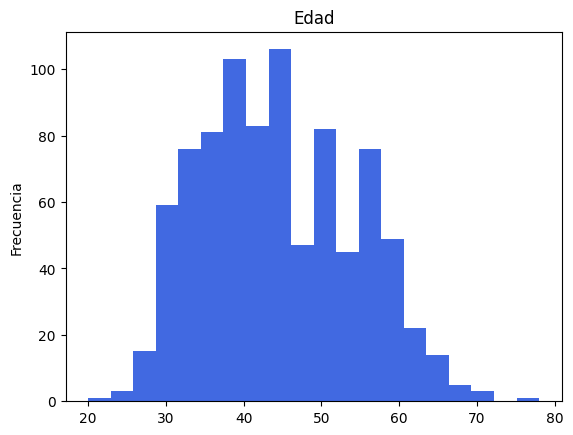

In [10]:
#Grafico de Histograma para la variable Edad
plt.hist(df['Edad'], bins=20, color='#4169E1')
plt.ylabel('Frecuencia')
plt.title('Edad')
plt.show()

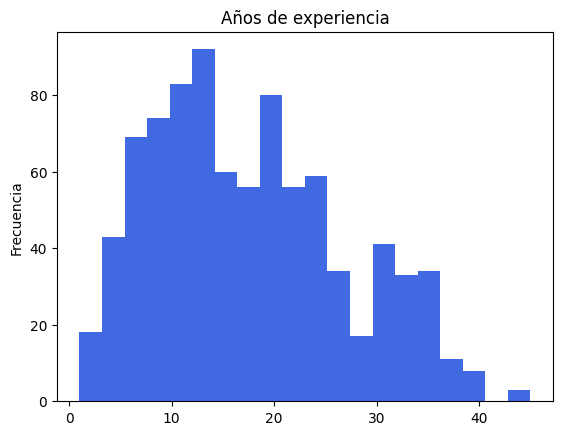

In [11]:
#Grafico de histograma para la variable Años de experiencia
plt.hist(df['Años de experiencia'], bins=20, color='#4169E1')
plt.ylabel('Frecuencia')
plt.title('Años de experiencia')
plt.show()

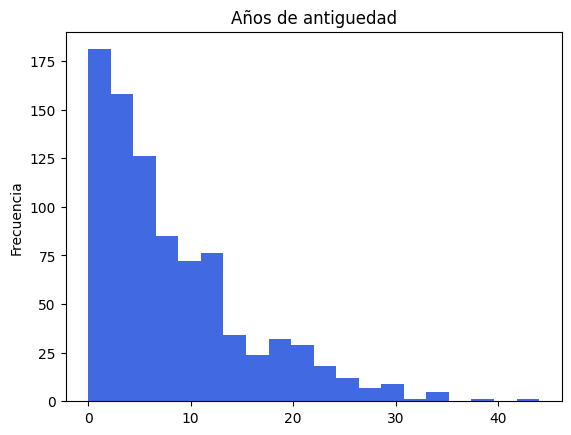

In [12]:
#Grafico de varaible Años en el Colegio
plt.hist(df['Años en el Colegio'], bins=20, color='#4169E1')
plt.ylabel('Frecuencia')
plt.title('Años de antiguedad')
plt.show()

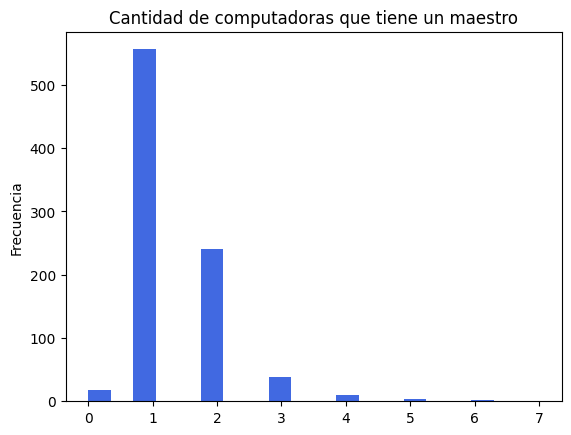

In [13]:
#Grafico de varaible cantidad de computadoras
plt.hist(df['Cantidad de computadoras'], bins=20, color='#4169E1')
plt.ylabel('Frecuencia')
plt.title('Cantidad de computadoras que tiene un maestro')
plt.show()

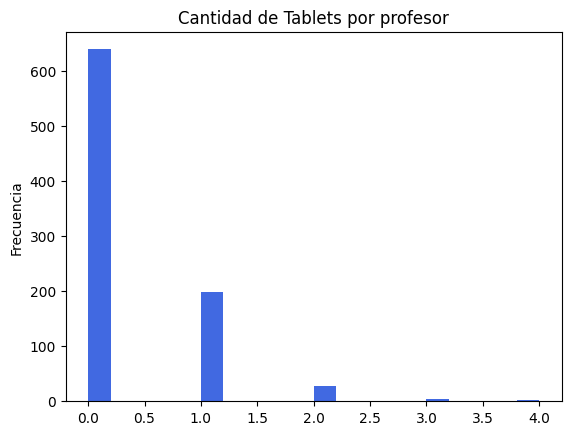

In [14]:
#Grafico de varaible
plt.hist(df['Cantidad de Tablets'], bins=20, color='#4169E1')
plt.ylabel('Frecuencia')
plt.title('Cantidad de Tablets por profesor')
plt.show()

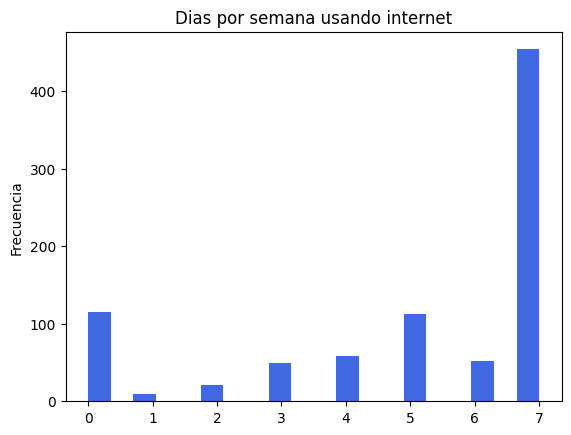

In [15]:
#Grafico de varaible
plt.hist(df['Dias en la semana usando internet'], bins=20, color='#4169E1')
plt.ylabel('Frecuencia')
plt.title('Dias por semana usando internet')
plt.show()

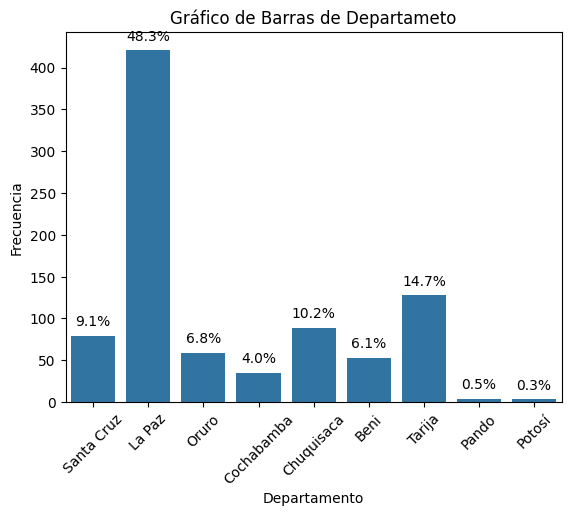

In [16]:
ax = sns.countplot(data=df, x='Departamento')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de Departameto')
plt.xticks(rotation=45)
total = float(len(df['Departamento']))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

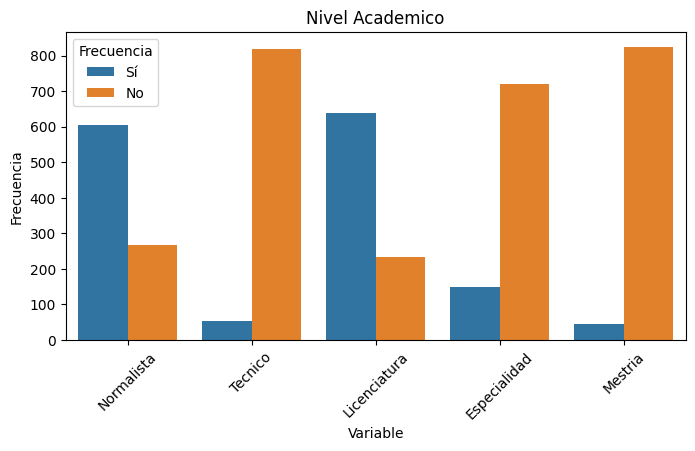

In [17]:
variables = ['Normalista','Tecnico','Licenciatura','Especialidad','Mestria']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Nivel Academico')
plt.xticks(rotation=45)
plt.show()

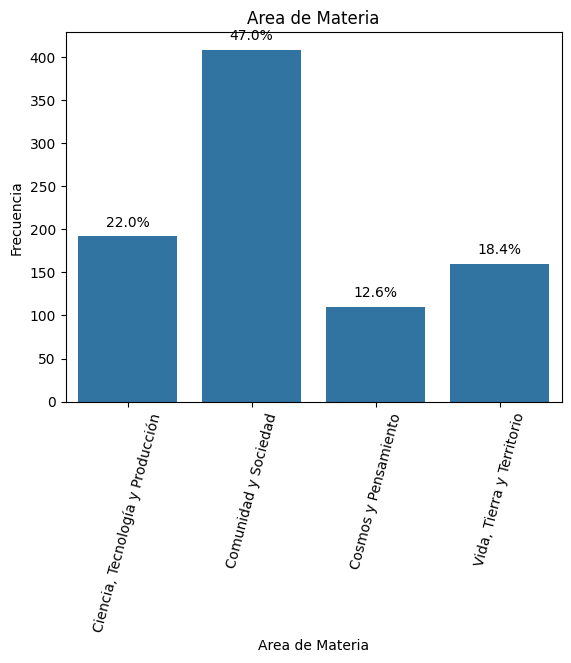

In [18]:
ax = sns.countplot(data=df, x='Area de Materia')
plt.ylabel('Frecuencia')
plt.title('Area de Materia')
plt.xticks(rotation=75)
total = float(len(df['Area de Materia']))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

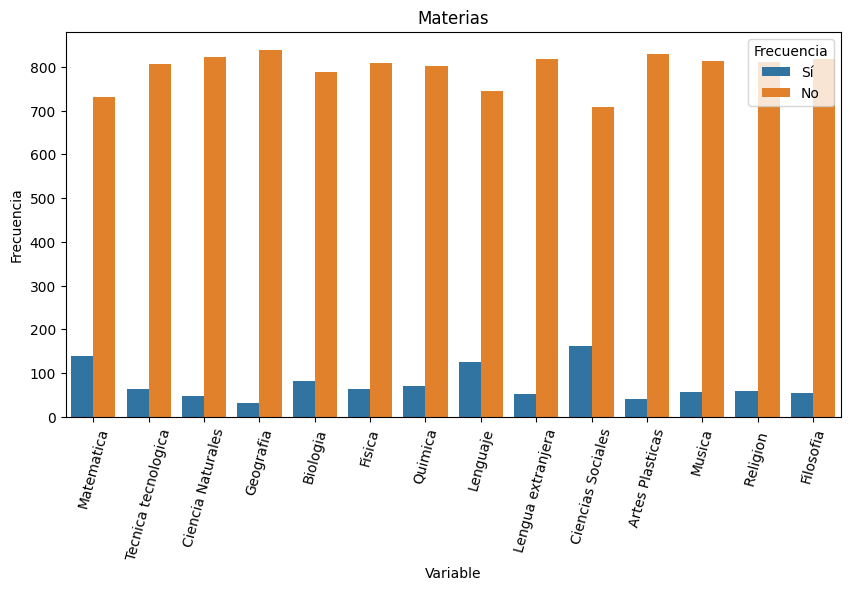

In [19]:
variables = ['Matematica','Tecnica tecnologica','Ciencia Naturales','Geografia','Biologia','Fisica',
             'Quimica','Lenguaje','Lengua extranjera','Ciencias Sociales',
             'Artes Plasticas','Musica','Religion ','Filosofia']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(10, 5))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Materias')
plt.xticks(rotation=75)
plt.show()

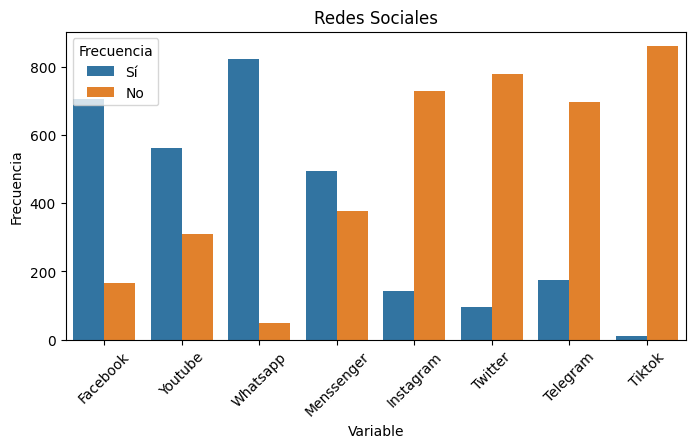

In [20]:
variables = ['Facebook','Youtube','Whatsapp','Menssenger','Instagram','Twitter','Telegram','Tiktok']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Redes Sociales')
plt.xticks(rotation=45)
plt.show()

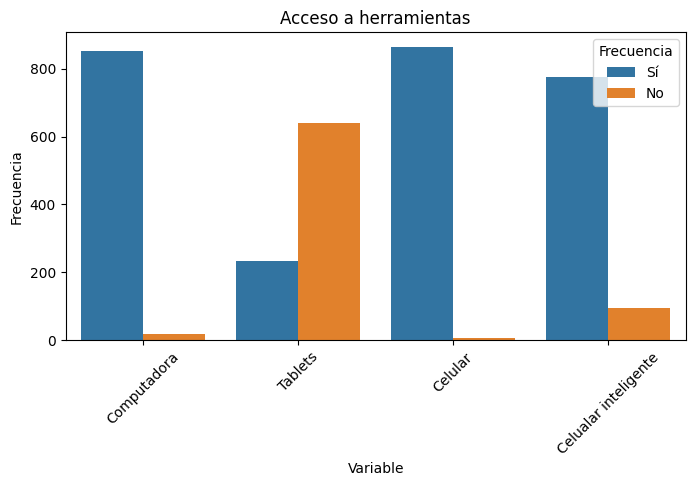

In [21]:
variables = ['Computadora','Tablets','Celular','Celualar inteligente']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Acceso a herramientas')
plt.xticks(rotation=45)
plt.show()

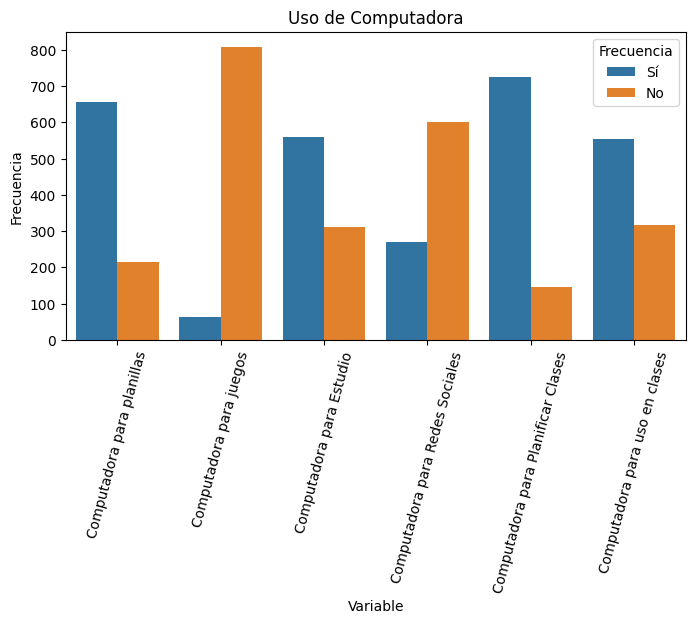

In [22]:
variables = ['Computadora para planillas','Computadora para juegos','Computadora para Estudio',
             'Computadora para Redes Sociales','Computadora para Planificar Clases',
             'Computadora para uso en clases']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Uso de Computadora')
plt.xticks(rotation=75)
plt.show()

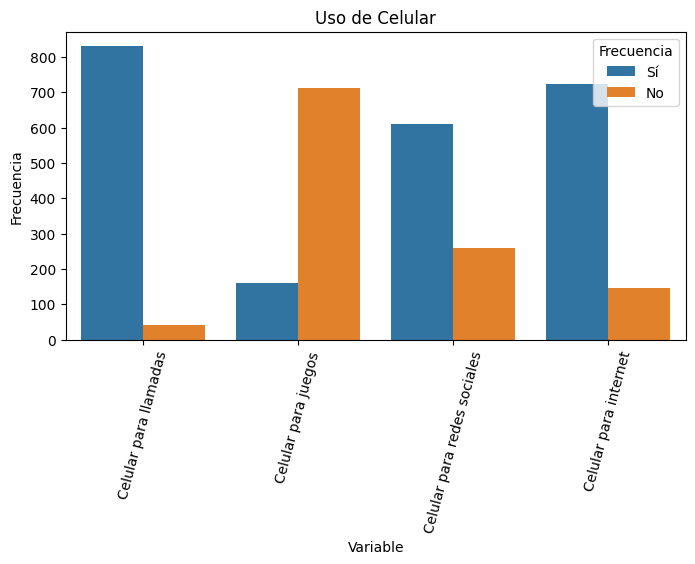

In [23]:
variables = ['Celular para llamadas','Celular para juegos','Celular para redes sociales','Celular para internet']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Uso de Celular')
plt.xticks(rotation=75)
plt.show()

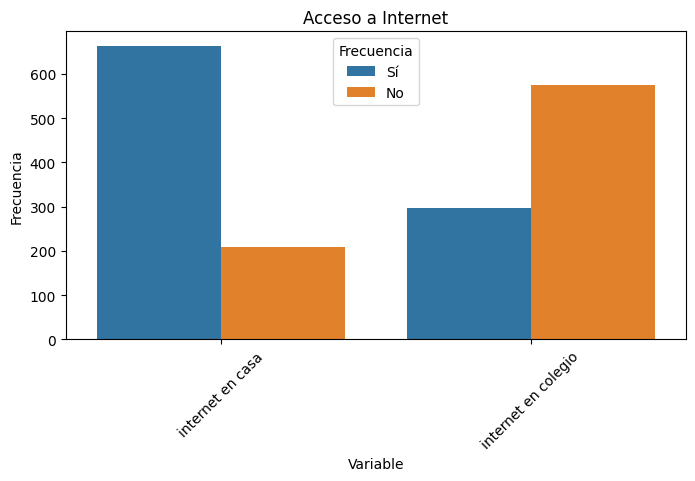

In [24]:
variables = ['internet en casa','internet en colegio']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Acceso a Internet')
plt.xticks(rotation=45)
plt.show()

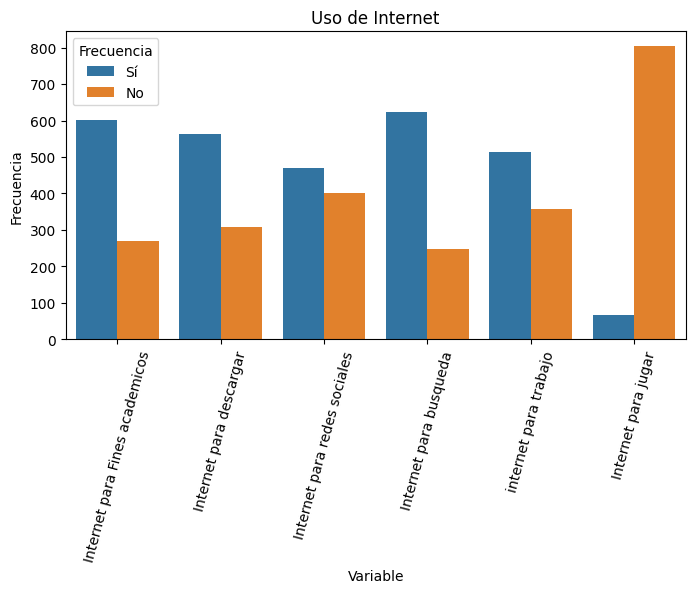

In [25]:
variables = ['Internet para Fines academicos','Internet para descargar','Internet para redes sociales',
             'Internet para busqueda','internet para trabajo','Internet para jugar']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Uso de Internet')
plt.xticks(rotation=75)
plt.show()

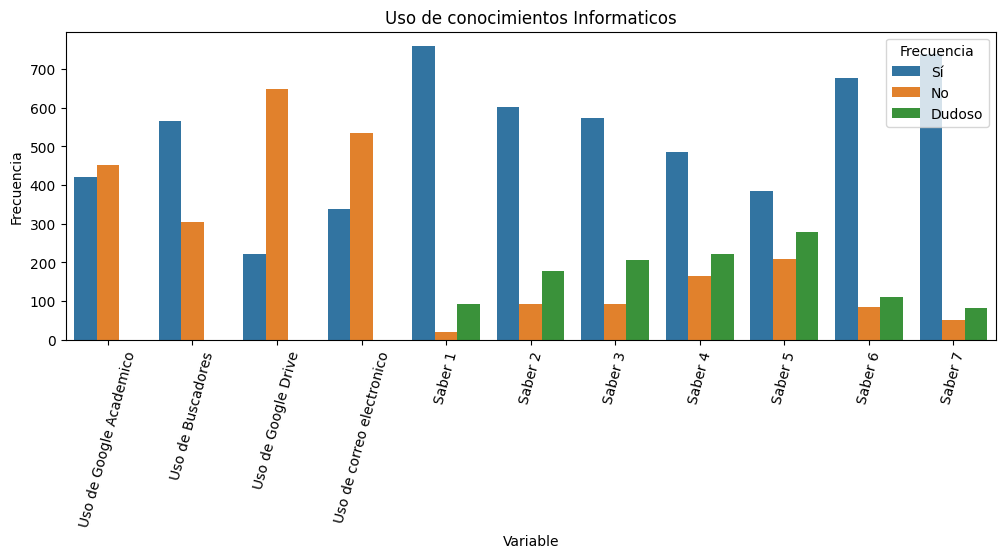

In [26]:
variables = ['Uso de Google Academico','Uso de Buscadores','Uso de Google Drive','Uso de correo electronico',
             'Saber 1','Saber 2','Saber 3','Saber 4','Saber 5','Saber 6','Saber 7']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(12, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Uso de conocimientos Informaticos')
plt.xticks(rotation=75)
plt.show()

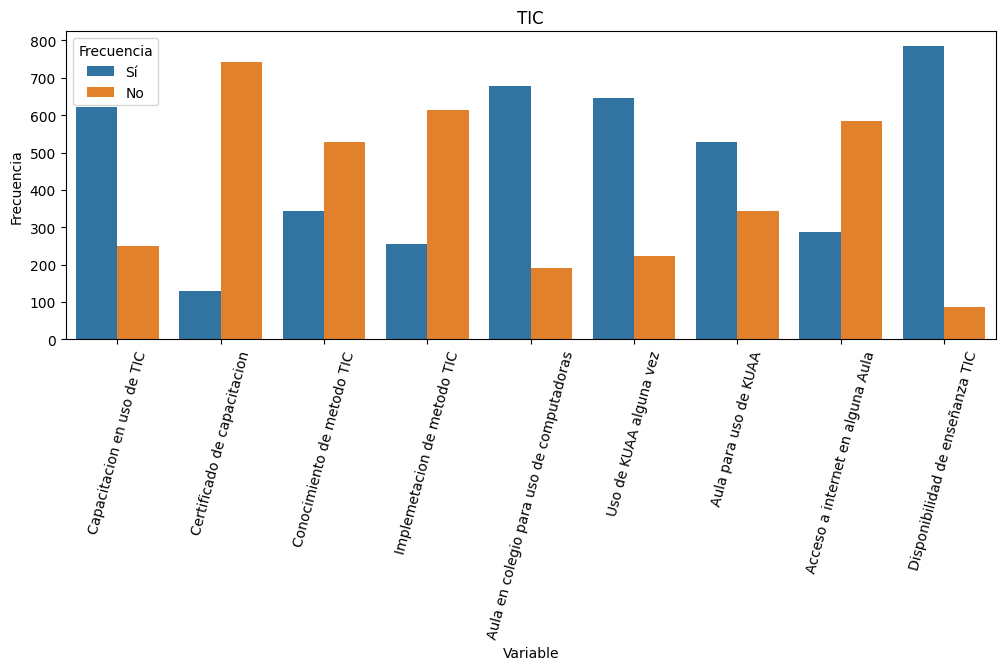

In [27]:
variables = ['Capacitacion en uso de TIC','Certificado de capacitacion','Conocimiento de metodo TIC',
             'Implemetacion de metodo TIC','Aula en colegio para uso de computadoras','Uso de KUAA alguna vez',
             'Aula para uso de KUAA','Acceso a internet en alguna Aula','Disponibilidad de enseñanza TIC']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(12, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('TIC')
plt.xticks(rotation=75)
plt.show()

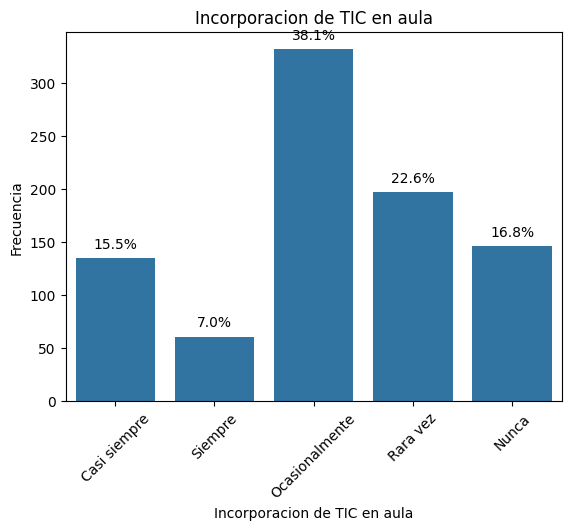

In [28]:
ax = sns.countplot(data=df, x='Incorporacion de TIC en aula')
plt.ylabel('Frecuencia')
plt.title('Incorporacion de TIC en aula')
plt.xticks(rotation=45)
total = float(len(df['Incorporacion de TIC en aula']))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

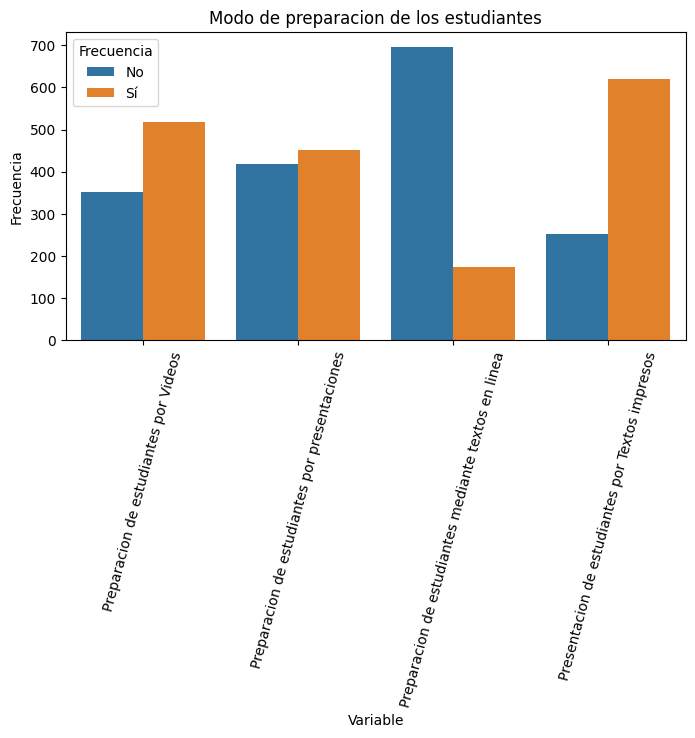

In [29]:
variables = ['Preparacion de estudiantes por Videos',
'Preparacion de estudiantes por presentaciones',
'Preparacion de estudiantes mediante textos en linea',
'Presentacion de estudiantes por Textos impresos']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Modo de preparacion de los estudiantes')
plt.xticks(rotation=75)
plt.show()

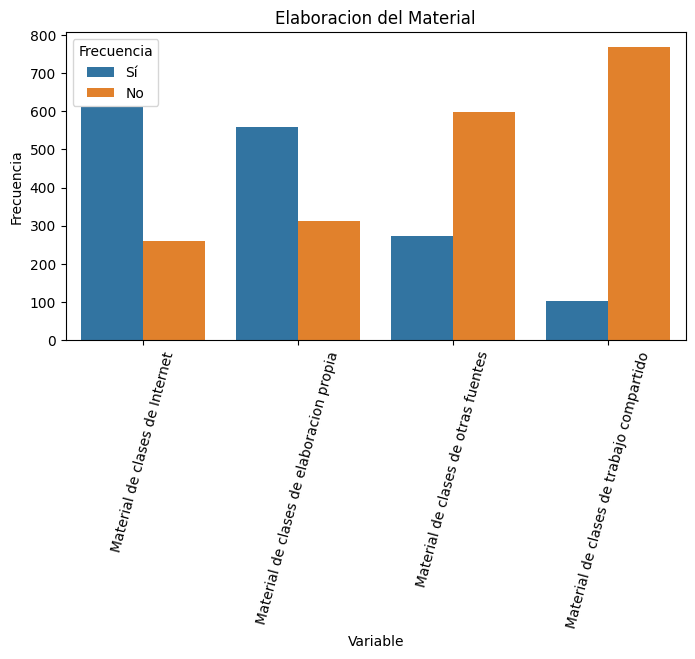

In [30]:
variables = ['Material de clases de Internet',
'Material de clases de elaboracion propia',
'Material de clases de otras fuentes',
'Material de clases de trabajo compartido']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Elaboracion del Material')
plt.xticks(rotation=75)
plt.show()

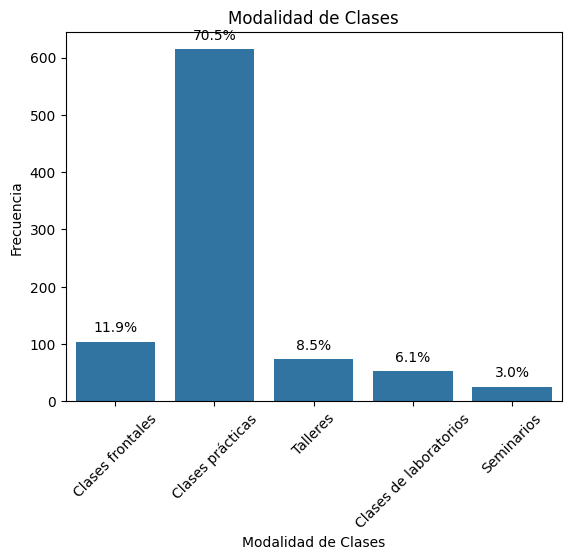

In [31]:
ax = sns.countplot(data=df, x='Modalidad de Clases')
plt.ylabel('Frecuencia')
plt.title('Modalidad de Clases')
plt.xticks(rotation=45)
total = float(len(df['Modalidad de Clases']))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

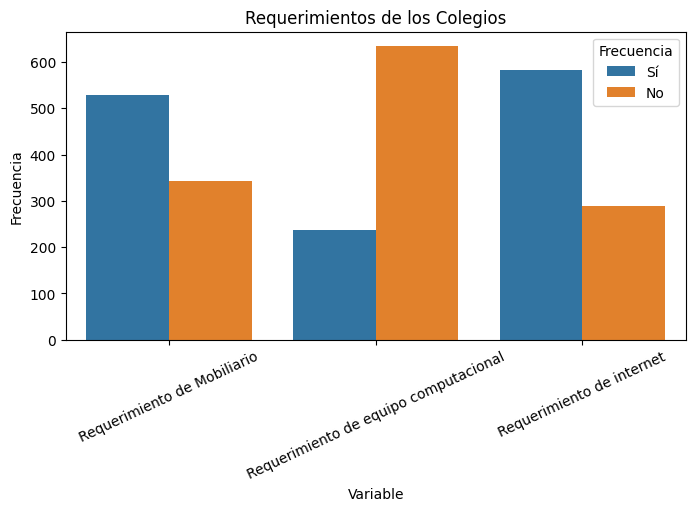

In [32]:
variables = ['Requerimiento de Mobiliario',
'Requerimiento de equipo computacional',
'Requerimiento de internet']
# Transponer el DataFrame y reformatear los datos
df_melted = df[variables].melt(var_name='Variable', value_name='Frecuencia')
# Configuración del tamaño de la figura
plt.figure(figsize=(8, 4))
# Crear un gráfico de barras
sns.countplot(data=df_melted, x='Variable', hue='Frecuencia')
plt.legend(title='Frecuencia')
plt.ylabel('Frecuencia')
plt.title('Requerimientos de los Colegios')
plt.xticks(rotation=25)
plt.show()

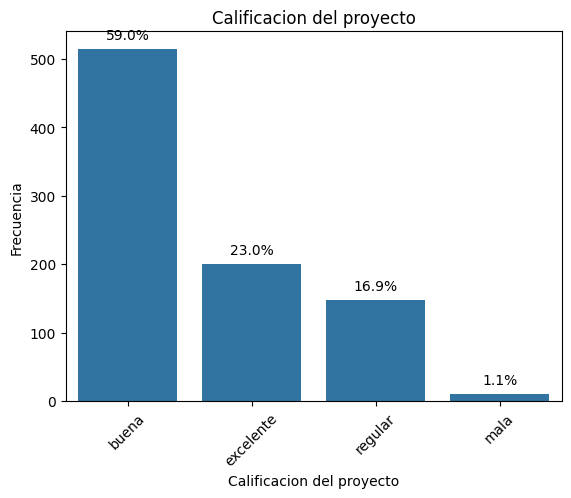

In [33]:
ax = sns.countplot(data=df, x='Calificacion del proyecto')
plt.ylabel('Frecuencia')
plt.title('Calificacion del proyecto')
plt.xticks(rotation=45)
total = float(len(df['Calificacion del proyecto']))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

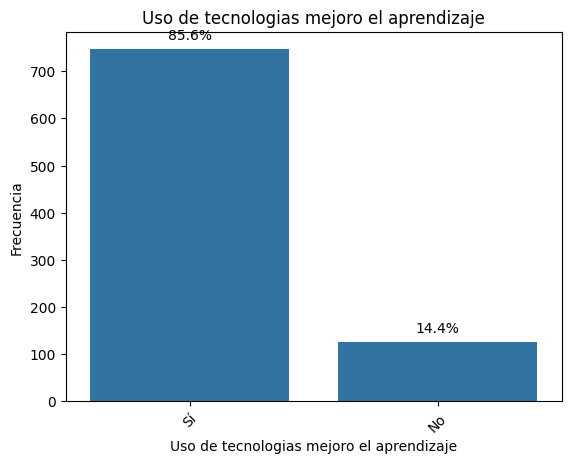

In [34]:
ax = sns.countplot(data=df, x='Uso de tecnologias mejoro el aprendizaje')
plt.ylabel('Frecuencia')
plt.title('Uso de tecnologias mejoro el aprendizaje')
plt.xticks(rotation=45)
total = float(len(df['Uso de tecnologias mejoro el aprendizaje']))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

**PASO 5: MANEJO DE DATOS FALTANTES**

In [35]:
df.isnull()

,Sexo,Edad,Departamento,Ciudad,Colegio,Años de experiencia,Tiempo en el colegio,Años en el Colegio,Normalista,Tecnico,...,Material de clases de Internet,Material de clases de elaboracion propia,Material de clases de otras fuentes,Material de clases de trabajo compartido,Modalidad de Clases,Requerimiento de Mobiliario,Requerimiento de equipo computacional,Requerimiento de internet,Calificacion del proyecto,Uso de tecnologias mejoro el aprendizaje
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
867,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
868,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df.isnull().sum()

Sexo                                        0
Edad                                        0
Departamento                                0
Ciudad                                      0
Colegio                                     0
                                           ..
Requerimiento de Mobiliario                 0
Requerimiento de equipo computacional       0
Requerimiento de internet                   0
Calificacion del proyecto                   0
Uso de tecnologias mejoro el aprendizaje    0
Length: 103, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Columns: 103 entries, Sexo to Uso de tecnologias mejoro el aprendizaje
dtypes: int64(6), object(97)
memory usage: 701.0+ KB


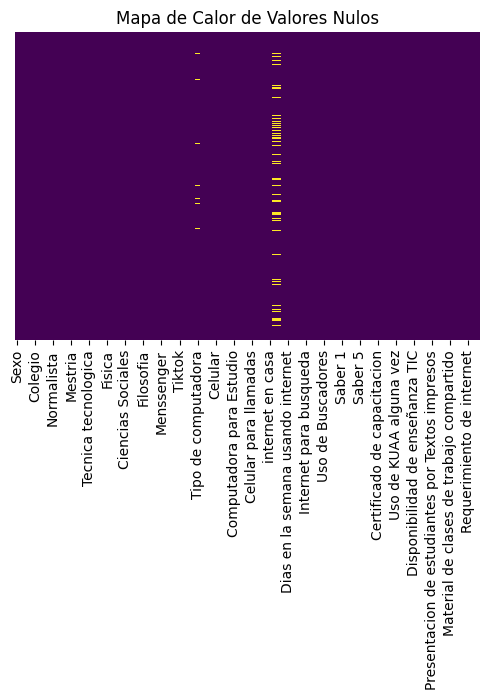

In [38]:
# Crear un mapa de calor para visualizar valores nulos
plt.figure(figsize=(6, 4))

# Utiliza el método heatmap de seaborn
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Mapa de Calor de Valores Nulos')
plt.show()

In [39]:
# Obtener la cantidad de valores nulos por columna
nulos_por_columna = df.isnull().sum()

# Imprimir el nombre de la columna y la cantidad de valores nulos
for columna, cantidad_nulos in nulos_por_columna.items():
    print(f"{columna}:                 {cantidad_nulos} valores nulos")

Sexo:                 0 valores nulos
Edad:                 0 valores nulos
Departamento:                 0 valores nulos
Ciudad:                 0 valores nulos
Colegio:                 0 valores nulos
Años de experiencia:                 0 valores nulos
Tiempo en el colegio:                 0 valores nulos
Años en el Colegio:                 0 valores nulos
Normalista:                 0 valores nulos
Tecnico:                 0 valores nulos
Licenciatura:                 0 valores nulos
Especialidad:                 0 valores nulos
Mestria:                 0 valores nulos
Doctorado:                 0 valores nulos
Area de Materia:                 0 valores nulos
Matematica:                 0 valores nulos
Tecnica tecnologica:                 0 valores nulos
Ciencia Naturales:                 0 valores nulos
Geografia:                 0 valores nulos
Biologia:                 0 valores nulos
Fisica:                 0 valores nulos
Quimica:                 0 valores nulos
Lenguaje:     

In [40]:
df['Tipo de computadora'] = df['Tipo de computadora'].fillna('Ninguna')

In [41]:
df['tipo de internet'] = df['tipo de internet'].fillna('Ninguna')

In [42]:
df['lugar de acceso a internet'] = df['lugar de acceso a internet'].fillna('Ninguno')

**PASO 6 : MANEJO DE VALORES ATIPICOS**

In [43]:
df.shape

(871, 103)

In [44]:
# Definir un umbral para identificar valores atípicos (por ejemplo, z-score > 3 o < -3)
umbral = 3

# Iterar a través de las columnas numéricas
for columna in df.select_dtypes(include=[np.number]):
    # Calcular z-scores para la columna actual
    z_scores = (df[columna] - df[columna].mean()) / df[columna].std()

    # Filtrar los datos originales para eliminar los valores atípicos en la columna actual
    df = df[(z_scores < umbral) & (z_scores > -umbral)]

In [45]:
df.shape

(818, 103)

**PASO 7: ANASLISIS UNIVARIADO Y BIVARAIDO**

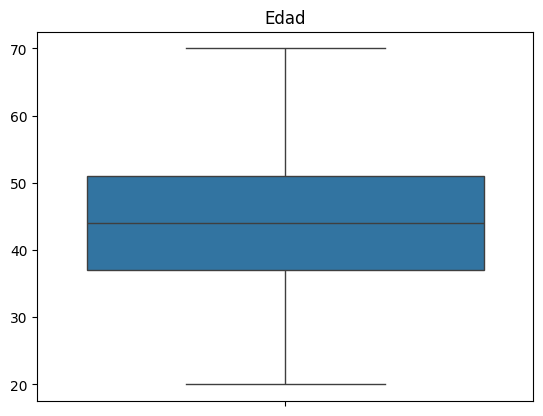

In [46]:
sns.boxplot(data=df, y='Edad')
plt.ylabel('')
plt.title('Edad')
plt.show()

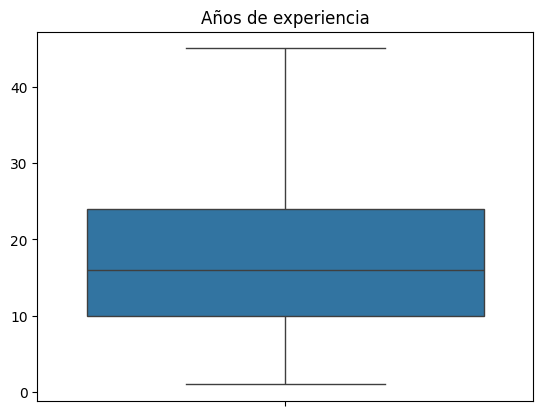

In [47]:
sns.boxplot(data=df, y='Años de experiencia')
plt.ylabel('')
plt.title('Años de experiencia')
plt.show()

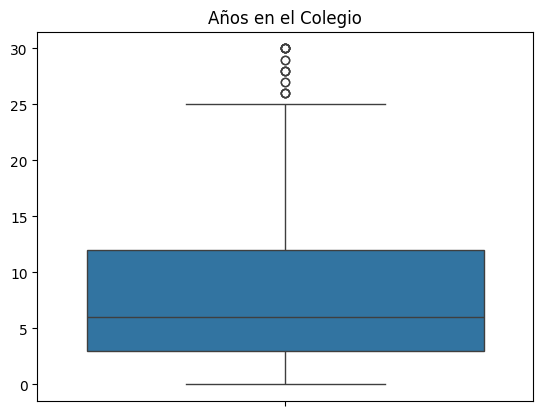

In [48]:
sns.boxplot(data=df, y='Años en el Colegio')
plt.ylabel('')
plt.title('Años en el Colegio')
plt.show()

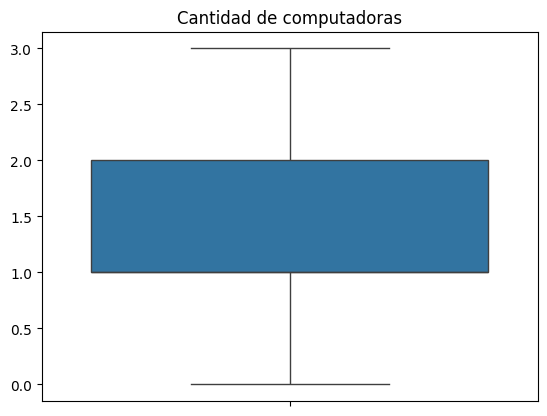

In [49]:
sns.boxplot(data=df, y='Cantidad de computadoras')
plt.ylabel('')
plt.title('Cantidad de computadoras')
plt.show()

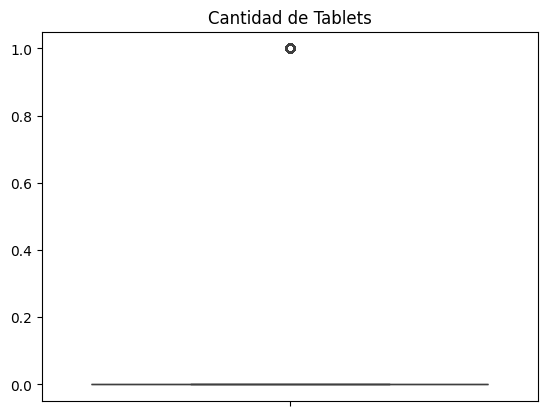

In [50]:
sns.boxplot(data=df, y='Cantidad de Tablets')
plt.ylabel('')
plt.title('Cantidad de Tablets')
plt.show()

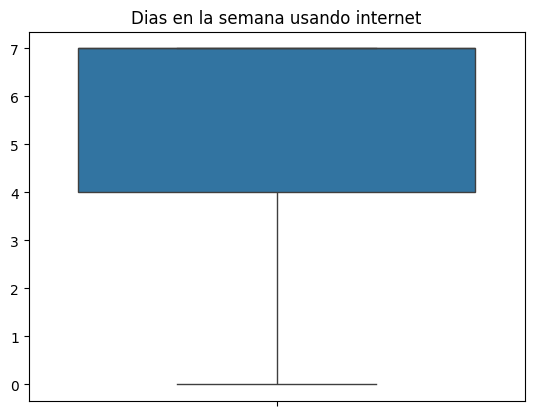

In [51]:
sns.boxplot(data=df, y='Dias en la semana usando internet')
plt.ylabel('')
plt.title('Dias en la semana usando internet')
plt.show()

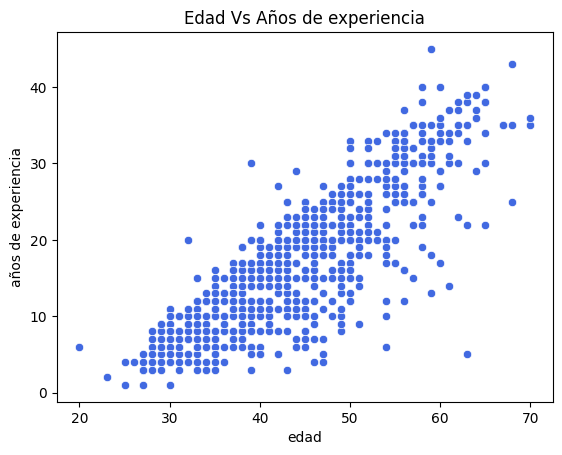

In [52]:
#diagrama de dispersión entre 'edad' y 'años de experiencia'
sns.scatterplot(data=df, x='Edad', y='Años de experiencia', color='#4169E1')
plt.xlabel('edad')
plt.ylabel('años de experiencia')
plt.title('Edad Vs Años de experiencia')
plt.show()

<ipython-input-53-96c38ad92131>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


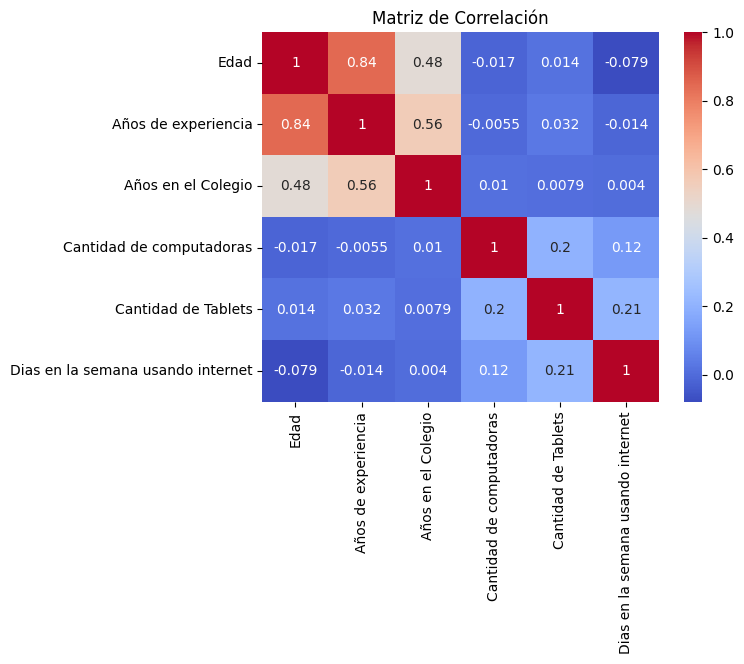

In [53]:
matriz_correlacion = df.corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [54]:
#Correlacion entre varaibles categoricas.
tabla_contingencia = pd.crosstab([df['Normalista'],df['Tecnico'],df['Licenciatura'],df['Especialidad'],df['Mestria']],
                                 df['Incorporacion de TIC en aula'])
tabla_contingencia

Incorporacion de TIC en aula                          Casi siempre  Nunca  \
Normalista Tecnico Licenciatura Especialidad Mestria                        
No         No      No           No           No                  0      1   
                                             Sí                  0      4   
                                Sí           No                  2      0   
                   Sí           No           No                 35     26   
                                             Sí                  2      0   
                                Sí           No                  1      1   
           Sí      No           No           No                  2      1   
                   Sí           No           No                  0      1   
Sí         No      No           No           No                 15     46   
                                             Sí                  3      0   
                                Sí           No                  0      3   
                                             Sí                  0      0   
                   Sí           No           No                 36     30   
                                             Sí                  5      2   
                                Sí           No                 15     16   
           Sí      No           No           No                  0      1   
                   Sí           No           No                  5      4   

Incorporacion de TIC en aula                          Ocasionalmente  \
Normalista Tecnico Licenciatura Especialidad Mestria                   
No         No      No           No           No                    1   
                                             Sí                    4   
                                Sí           No                    5   
                   Sí           No           No                   74   
                                             Sí                    1   
                                Sí           No                    3   
           Sí      No           No           No                    4   
                   Sí           No           No                    0   
Sí         No      No           No           No                   56   
                                             Sí                    0   
                                Sí           No                    6   
                                             Sí                    0   
                   Sí           No           No                  101   
                                             Sí                    6   
                                Sí           No                   43   
           Sí      No           No           No                    2   
                   Sí           No           No                   11   

Incorporacion de TIC en aula                          Rara vez  Siempre  
Normalista Tecnico Licenciatura Especialidad Mestria                     
No         No      No           No           No              0        0  
                                             Sí              5        2  
                                Sí           No              1        1  
                   Sí           No           No             43       16  
                                             Sí              0        1  
                                Sí           No              5        0  
           Sí      No           No           No              0        1  
                   Sí           No           No              1        0  
Sí         No      No           No           No             41        4  
                                             Sí              0        0  
                                Sí           No              1        1  
                                             Sí              0        2  
                   Sí           No           No             53       10  
                                             Sí          

In [55]:
#Correlacion entre varaibles categoricas.
tabla_contingencia = pd.crosstab(df['internet en colegio'], df['Incorporacion de TIC en aula'])
tabla_contingencia

Incorporacion de TIC en aula,Casi siempre,Nunca,Ocasionalmente,Rara vez,Siempre
internet en colegio,,,,,
No,69,98,207,139,28
Sí,52,38,110,52,25


In [56]:
#Correlacion entre varaibles categoricas.
tabla_contingencia = pd.crosstab(df['Uso de tecnologias mejoro el aprendizaje'], df['Incorporacion de TIC en aula'])
tabla_contingencia

Incorporacion de TIC en aula,Casi siempre,Nunca,Ocasionalmente,Rara vez,Siempre
Uso de tecnologias mejoro el aprendizaje,,,,,
No,5,40,35,32,3
Sí,116,96,282,159,50


In [57]:
#Correlacion entre varaibles categoricas.
tabla_contingencia = pd.crosstab([df['Requerimiento de internet'],
                                  df["internet en colegio"]],
                                 df['Aula en colegio para uso de computadoras'])
tabla_contingencia

Aula en colegio para uso de computadoras        No   Sí
Requerimiento de internet internet en colegio          
No                        No                    34  114
                          Sí                     7  116
Sí                        No                   120  273
                          Sí                    16  138

In [58]:
#Correlacion entre varaibles categoricas.
tabla_contingencia = pd.crosstab([df['Requerimiento de Mobiliario'],df['Requerimiento de equipo computacional'],
                                  df['Requerimiento de internet'], df['internet en colegio']], df['Aula en colegio para uso de computadoras'])
tabla_contingencia

Aula en colegio para uso de computadoras                                                                         No  \
Requerimiento de Mobiliario Requerimiento de equipo computacional Requerimiento de internet internet en colegio       
No                          No                                    No                        No                    7   
                                                                                            Sí                    1   
                                                                  Sí                        No                   19   
                                                                                            Sí                    2   
                            Sí                                    No                        No                    4   
                                                                                            Sí                    0   
                                                                  Sí                        No                    6   
                                                                                            Sí                    0   
Sí                          No                                    No                        No                   20   
                                                                                            Sí                    5   
                                                                  Sí                        No                   44   
                                                                                            Sí                   12   
                            Sí                                    No                        No                    3   
                                                                                            Sí                    1   
                                                                  Sí                        No                   51   
                                                                                            Sí                    2   

Aula en colegio para uso de computadoras                                                                          Sí  
Requerimiento de Mobiliario Requerimiento de equipo computacional Requerimiento de internet internet en colegio       
No                          No                                    No                        No                    46  
                                                                                            Sí                    37  
                                                                  Sí                        No                   124  
                                                                                            Sí                    43  
                            Sí                                    No                        No                    12  
                                                                                            Sí                     8  
                                                                  Sí                        No                    11  
                                                                                            Sí                    10  
Sí                          No                                    No                        No                    50  
                                                                                            Sí                    64  
                                                                  Sí                        No                    80  
                                                                                            Sí                    47  
                            Sí                                    No                        No                     6  
                                                                        

In [59]:
#Correlacion entre varaibles categoricas.
tabla_contingencia = pd.crosstab([df['Saber 1'],
df['Incorporacion de TIC en aula']],
df['Disponibilidad de enseñanza TIC'])
tabla_contingencia

Disponibilidad de enseñanza TIC       No   Sí
Saber 1 Incorporacion de TIC en aula         
Dudoso  Casi siempre                   1    7
        Nunca                          8   19
        Ocasionalmente                 8   30
        Rara vez                       4   13
        Siempre                        0    1
No      Casi siempre                   0    1
        Nunca                          1    6
        Ocasionalmente                 0    1
        Rara vez                       1    5
Sí      Casi siempre                   7  105
        Nunca                         16   86
        Ocasionalmente                21  257
        Rara vez                      14  154
        Siempre                        1   51

In [60]:
#Correlacion entre varaibles categoricas.
tabla_contingencia = pd.crosstab([df['Saber 3'],
df['Incorporacion de TIC en aula']],
df['Disponibilidad de enseñanza TIC'])
tabla_contingencia

Disponibilidad de enseñanza TIC       No   Sí
Saber 3 Incorporacion de TIC en aula         
Dudoso  Casi siempre                   2   17
        Nunca                         10   28
        Ocasionalmente                 7   77
        Rara vez                       6   46
        Siempre                        0    7
No      Casi siempre                   0    5
        Nunca                          4   25
        Ocasionalmente                 7   18
        Rara vez                       2   25
Sí      Casi siempre                   6   91
        Nunca                         11   58
        Ocasionalmente                15  193
        Rara vez                      11  101
        Siempre                        1   45

In [61]:
#Correlacion entre varaibles categoricas.
tabla_contingencia = pd.crosstab([df['Saber 5'],
df['Incorporacion de TIC en aula']],
df['Disponibilidad de enseñanza TIC'])
tabla_contingencia

Disponibilidad de enseñanza TIC       No   Sí
Saber 5 Incorporacion de TIC en aula         
Dudoso  Casi siempre                   1   31
        Nunca                         10   41
        Ocasionalmente                12  103
        Rara vez                       6   60
        Siempre                        0    6
No      Casi siempre                   2   17
        Nunca                          8   42
        Ocasionalmente                 8   50
        Rara vez                       8   57
        Siempre                        0    8
Sí      Casi siempre                   5   65
        Nunca                          7   28
        Ocasionalmente                 9  135
        Rara vez                       5   55
        Siempre                        1   38

In [62]:
import pandas as pd
#Correlacion entre varaibles categoricas.
tabla_contingencia = pd.crosstab([df['Uso de Google Academico'],df['Uso de Google Drive'],
df['Incorporacion de TIC en aula']], df['Disponibilidad de enseñanza TIC'])
tabla_contingencia

Disponibilidad de enseñanza TIC                                           No  \
Uso de Google Academico Uso de Google Drive Incorporacion de TIC en aula       
No                      No                  Casi siempre                   5   
                                            Nunca                         14   
                                            Ocasionalmente                13   
                                            Rara vez                      12   
                                            Siempre                        0   
                        Sí                  Casi siempre                   0   
                                            Nunca                          2   
                                            Ocasionalmente                 0   
                                            Rara vez                       2   
                                            Siempre                        0   
Sí                      No                  Casi siempre                   1   
                                            Nunca                          7   
                                            Ocasionalmente                12   
                                            Rara vez                       5   
                                            Siempre                        0   
                        Sí                  Casi siempre                   2   
                                            Nunca                          2   
                                            Ocasionalmente                 4   
                                            Rara vez                       0   
                                            Siempre                        1   

Disponibilidad de enseñanza TIC                                            Sí  
Uso de Google Academico Uso de Google Drive Incorporacion de TIC en aula       
No                      No                  Casi siempre                   36  
                                            Nunca                          67  
                                            Ocasionalmente                121  
                                            Rara vez                       76  
                                            Siempre                        14  
                        Sí                  Casi siempre                   13  
                                            Nunca                           2  
                                            Ocasionalmente                 34  
                                            Rara vez                       16  
                                            Siempre                         5  
Sí                      No                  Casi siempre                   35  
                                            Nunca                          37  
                                            Ocasionalmente                 87  
                                            Rara vez                       58  
                                            Siempre                        18  
                        Sí                  Casi siempre                   29  
                                            Nunca                           5  
                                            Ocasionalmente                 46  
                                            Rara vez                       22  
                                            Siempre                        15

**PASO 8 : SELECCION DE VARAIBLES MAS SOBRESALIENTES**

In [63]:
variables_sobresalientes = ['Departamento','internet en colegio', 'Aula en colegio para uso de computadoras',
                            'Modalidad de Clases', 'Incorporacion de TIC en aula',
                            'Uso de tecnologias mejoro el aprendizaje']
df1 = df[variables_sobresalientes].copy()

In [64]:
# Definir una función para evaluar las condiciones y crear la columna 'apto para la inclusion digital'
def evaluar_inclusion_digital(row):
    if (
         row["internet en colegio"] == 'Sí' and
        row['Aula en colegio para uso de computadoras'] == 'Sí' and
        row['Modalidad de Clases'] != "Clases frontales" and
         row["Incorporacion de TIC en aula"] != 'Nunca' and
         row["Uso de tecnologias mejoro el aprendizaje"] == "Sí" #and
         #row["Capacitacion en uso de TIC"] == "Sí"
    ):
        return 'Alto'
    else:
        return 'Bajo'

# Aplicar la función para crear la columna 'apto para la inclusion digital'
df1["impacto de inclusion digital"] = df1.apply(evaluar_inclusion_digital, axis=1)

In [65]:
df1.head()

,Departamento,internet en colegio,Aula en colegio para uso de computadoras,Modalidad de Clases,Incorporacion de TIC en aula,Uso de tecnologias mejoro el aprendizaje,impacto de inclusion digital
0,Santa Cruz,Sí,Sí,Clases frontales,Casi siempre,Sí,Bajo
1,La Paz,No,Sí,Clases prácticas,Siempre,Sí,Bajo
2,La Paz,Sí,Sí,Clases prácticas,Ocasionalmente,Sí,Alto
3,La Paz,No,Sí,Clases prácticas,Ocasionalmente,Sí,Bajo
4,La Paz,No,Sí,Clases prácticas,Ocasionalmente,Sí,Bajo


In [66]:
# prompt: exportar df1 con nombre de tabla minable en formato de excel

df1.to_excel('minable_table.xlsx', index=False)


**PASO 9 : EQUIDAD DE VALORES EN CANTIDAD**

In [67]:
#mostrar la cantidad de cada valor único en la columna "impacto de inclusion digital"
print(df1["impacto de inclusion digital"].value_counts())

Bajo    645
Alto    173
Name: impacto de inclusion digital, dtype: int64


In [68]:
from sklearn.utils import resample

print(df1["impacto de inclusion digital"].value_counts())

# Separar las clases en DataFrames separados
df_class_alto = df1[df1["impacto de inclusion digital"] == 'Alto']
df_class_bajo = df1[df1["impacto de inclusion digital"] == 'Bajo']

# Determinar la cantidad de muestras deseada para equilibrar las clases
target_sample_size = min(len(df_class_alto), len(df_class_bajo))

# Submuestrear cada clase para igualar la cantidad de muestras
df_class_alto_downsampled = resample(df_class_alto, replace=False, n_samples=target_sample_size, random_state=42)
df_class_bajo_downsampled = resample(df_class_bajo, replace=False, n_samples=target_sample_size, random_state=42)

# Combinar las clases balanceadas en un nuevo DataFrame
df2_balanced = pd.concat([df_class_alto_downsampled, df_class_bajo_downsampled])

# Verificar el equilibrio de clases en el nuevo DataFrame
print(df2_balanced["impacto de inclusion digital"].value_counts())

Bajo    645
Alto    173
Name: impacto de inclusion digital, dtype: int64
Alto    173
Bajo    173
Name: impacto de inclusion digital, dtype: int64


**PASO 10: ONE HOT ENCODING**

In [69]:
# Crear un diccionario de mapeo de departamentos a valores numéricos
mapeo_departamentos = {
    'Pando': 1,
    'Beni': 2,
    'La Paz': 3,
    'Oruro': 4,
    'Potosí': 5,
    'Cochabamba': 6,
    'Chuquisaca': 7,
    'Tarija': 8,
    'Santa Cruz': 9
}

# Reemplazar los valores en la columna 'Departamento'
df2_balanced['Departamento'] = df2_balanced['Departamento'].replace(mapeo_departamentos)

In [70]:
df2_balanced.shape

(346, 7)

In [71]:
# Aplicar One-Hot Encoding a todas las columnas categóricas en df1
df_encoded = pd.get_dummies(df2_balanced)

# Ver el DataFrame con One-Hot Encoding
df_encoded.head()

,Departamento,internet en colegio_No,internet en colegio_Sí,Aula en colegio para uso de computadoras_No,Aula en colegio para uso de computadoras_Sí,Modalidad de Clases_Clases de laboratorios,Modalidad de Clases_Clases frontales,Modalidad de Clases_Clases prácticas,Modalidad de Clases_Seminarios,Modalidad de Clases_Talleres,Incorporacion de TIC en aula_Casi siempre,Incorporacion de TIC en aula_Nunca,Incorporacion de TIC en aula_Ocasionalmente,Incorporacion de TIC en aula_Rara vez,Incorporacion de TIC en aula_Siempre,Uso de tecnologias mejoro el aprendizaje_No,Uso de tecnologias mejoro el aprendizaje_Sí,impacto de inclusion digital_Alto,impacto de inclusion digital_Bajo
851,7,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
286,8,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
502,8,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0
397,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
687,8,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0


In [72]:
df_encoded.shape

(346, 19)

In [73]:
df_encoded

,Departamento,internet en colegio_No,internet en colegio_Sí,Aula en colegio para uso de computadoras_No,Aula en colegio para uso de computadoras_Sí,Modalidad de Clases_Clases de laboratorios,Modalidad de Clases_Clases frontales,Modalidad de Clases_Clases prácticas,Modalidad de Clases_Seminarios,Modalidad de Clases_Talleres,Incorporacion de TIC en aula_Casi siempre,Incorporacion de TIC en aula_Nunca,Incorporacion de TIC en aula_Ocasionalmente,Incorporacion de TIC en aula_Rara vez,Incorporacion de TIC en aula_Siempre,Uso de tecnologias mejoro el aprendizaje_No,Uso de tecnologias mejoro el aprendizaje_Sí,impacto de inclusion digital_Alto,impacto de inclusion digital_Bajo
851,7,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
286,8,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
502,8,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0
397,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
687,8,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,3,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
18,3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1
590,3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
684,9,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [74]:
# Resetear el índice para obtener un índice numérico explícito
df_export = df_encoded.reset_index()

# Alternativamente, si deseas incluir el índice en el archivo CSV
df_export.to_excel("minable_table_encoded.xlsx", index=True)

## **MODELAMIENTO, ENTRENAMIENTO Y PRUEBA**

Accuracy: 0.9714285714285714
Precision: 0.95
Recall: 1.0
F1-score: 0.9743589743589743
AUC-ROC: 0.9971217105263158

Matriz de Confusión:
[[30  2]
 [ 0 38]]


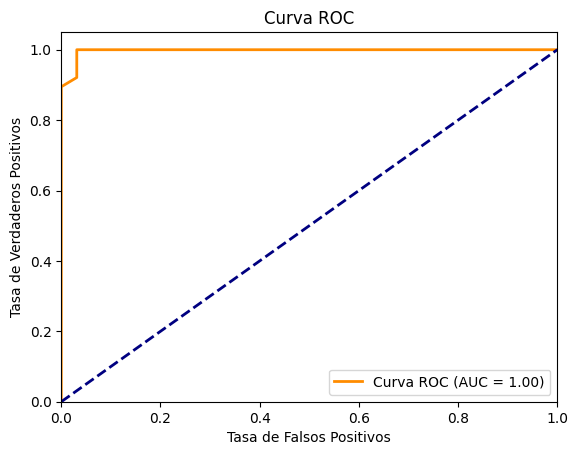

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Variables predictoras
X = df_encoded[['Departamento',"internet en colegio_Sí", "Aula en colegio para uso de computadoras_Sí",
                "Modalidad de Clases_Clases de laboratorios",'Modalidad de Clases_Clases prácticas',
                'Incorporacion de TIC en aula_Casi siempre','Incorporacion de TIC en aula_Ocasionalmente',
                'Incorporacion de TIC en aula_Rara vez','Incorporacion de TIC en aula_Siempre',
                'Uso de tecnologias mejoro el aprendizaje_Sí']]

# Variable objetivo
y = df_encoded["impacto de inclusion digital_Alto"]

# Dividision de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creacion del modelo de regresión logística
model = LogisticRegression(max_iter=100)

#Entrenamiento del modelo
model.fit(X_train, y_train)

#Prueba del modelo
y_pred = model.predict(X_test)

# Calculo de las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Impresion de las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)

# Matriz de confusión
print("\nMatriz de Confusión:")
print(conf_matrix)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [76]:
# Crear un DataFrame con las etiquetas reales (y_test) y las predicciones (y_pred)
results_df = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred})

# Mostrar el DataFrame con las etiquetas reales y predicciones
results_df.head()

,Real,Predicciones
638,1,1
754,1,1
271,0,0
140,0,0
456,0,0


Accuracy (Naive Bayes): 0.9714285714285714
Precision (Naive Bayes): 0.95
Recall (Naive Bayes): 1.0
F1-score (Naive Bayes): 0.9743589743589743
AUC-ROC (Naive Bayes): 0.9814967105263158

Matriz de Confusión:
[[30  2]
 [ 0 38]]


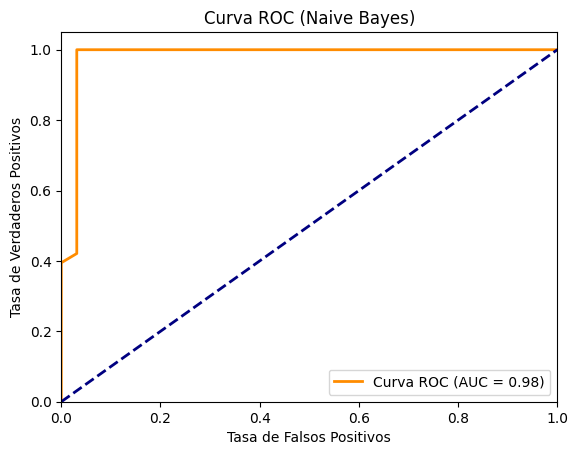

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Variables predictoras
X = df_encoded[['Departamento',"internet en colegio_Sí", "Aula en colegio para uso de computadoras_Sí",
                "Modalidad de Clases_Clases de laboratorios",'Modalidad de Clases_Clases prácticas',
                'Incorporacion de TIC en aula_Casi siempre',
                'Incorporacion de TIC en aula_Ocasionalmente','Incorporacion de TIC en aula_Rara vez',
                'Incorporacion de TIC en aula_Siempre','Uso de tecnologias mejoro el aprendizaje_Sí',]]

# Variable onjetivo
y = df_encoded["impacto de inclusion digital_Alto"]

# Dividision de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear del Modelo
nb_model = GaussianNB()

#Entrenamiento del modelo
nb_model.fit(X_train, y_train)

#Predicciones en el conjunto de prueba
y_pred_nb = nb_model.predict(X_test)

# Calculo de métricas de evaluación
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Impresion de métricas
print("Accuracy (Naive Bayes):", accuracy_nb)
print("Precision (Naive Bayes):", precision_nb)
print("Recall (Naive Bayes):", recall_nb)
print("F1-score (Naive Bayes):", f1_nb)
print("AUC-ROC (Naive Bayes):", roc_auc_nb)

# Matriz de confusión
print("\nMatriz de Confusión:")
print(conf_matrix)

# Curva ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

In [78]:
# Crear un DataFrame con las etiquetas reales (y_test) y las predicciones (y_pred)
results_df = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred_nb})

# Mostrar el DataFrame con las etiquetas reales y predicciones
results_df.head()

,Real,Predicciones
638,1,1
754,1,1
271,0,0
140,0,0
456,0,0


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Variables predictoras
X = df_encoded[['Departamento',"internet en colegio_Sí", "Aula en colegio para uso de computadoras_Sí",
                "Modalidad de Clases_Clases de laboratorios",'Modalidad de Clases_Clases prácticas',
                'Incorporacion de TIC en aula_Casi siempre','Incorporacion de TIC en aula_Ocasionalmente',
                'Incorporacion de TIC en aula_Rara vez','Incorporacion de TIC en aula_Siempre',
                'Uso de tecnologias mejoro el aprendizaje_Sí',]]

#Varaible objetivo
y = df_encoded["impacto de inclusion digital_Alto"]

# Dividision de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creacion del modelo de k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=3)

#Entrenamiento del modelo
knn_model.fit(X_train, y_train)

#Predicciones del conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# Calculo de métricas de evaluación
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Impresion de las métricas
print("Accuracy (k-NN):", accuracy_knn)
print("Precision (k-NN):", precision_knn)
print("Recall (k-NN):", recall_knn)
print("F1-score (k-NN):", f1_knn)

# Matriz de confusión
print("\nMatriz de Confusión:")
print(conf_matrix)

# No se calcula AUC-ROC para k-NN ya que no genera probabilidades directas

# Curva ROC (No aplicable para k-NN)
# k-NN no genera probabilidades directas, por lo que no se puede calcular una curva ROC en este caso.


Accuracy (k-NN): 0.8857142857142857
Precision (k-NN): 0.8571428571428571
Recall (k-NN): 0.9473684210526315
F1-score (k-NN): 0.9

Matriz de Confusión:
[[26  6]
 [ 2 36]]


In [80]:
# Crear un DataFrame con las etiquetas reales (y_test) y las predicciones (y_pred)
results_df = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred_knn})

# Mostrar el DataFrame con las etiquetas reales y predicciones
results_df.head()

,Real,Predicciones
638,1,1
754,1,1
271,0,0
140,0,0
456,0,0


Accuracy (SVM): 0.9428571428571428
Precision (SVM): 0.9047619047619048
Recall (SVM): 1.0
F1-score (SVM): 0.9500000000000001
AUC-ROC (SVM): 0.989720394736842

Matriz de Confusión:
[[28  4]
 [ 0 38]]


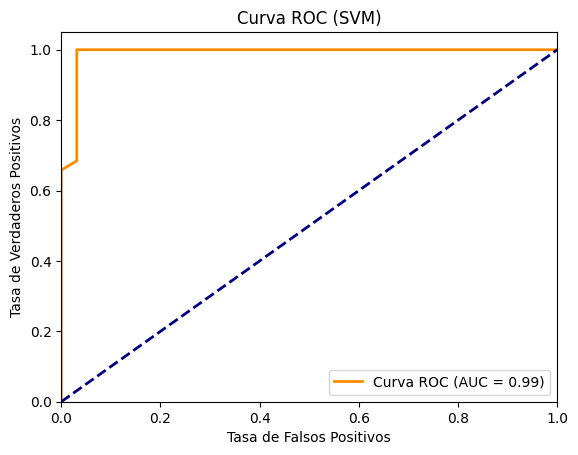

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Variables predictoras
X = df_encoded[['Departamento',"internet en colegio_Sí", "Aula en colegio para uso de computadoras_Sí",
                "Modalidad de Clases_Clases de laboratorios",'Modalidad de Clases_Clases prácticas',
                'Incorporacion de TIC en aula_Casi siempre','Incorporacion de TIC en aula_Ocasionalmente',
                'Incorporacion de TIC en aula_Rara vez','Incorporacion de TIC en aula_Siempre',
                'Uso de tecnologias mejoro el aprendizaje_Sí',]]

#Varaible objetivo
y = df_encoded["impacto de inclusion digital_Alto"]

# Dividision de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creacion del modelo SVM con kernel radial (RBF)
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

#Entrenamiento del modelo
svm_model.fit(X_train, y_train)

#Predicciones del conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Calculo de métricas de evaluación
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Impresion de las métricas
print("Accuracy (SVM):", accuracy_svm)
print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1-score (SVM):", f1_svm)
print("AUC-ROC (SVM):", roc_auc_svm)

# Matriz de confusión
print("\nMatriz de Confusión:")
print(conf_matrix)

# Curva ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (SVM)')
plt.legend(loc="lower right")
plt.show()

In [82]:
# Crear un DataFrame con las etiquetas reales (y_test) y las predicciones (y_pred)
results_df = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred_svm})

# Mostrar el DataFrame con las etiquetas reales y predicciones
results_df.head()

,Real,Predicciones
638,1,1
754,1,1
271,0,0
140,0,0
456,0,0


Epoch 1/100
4/4 [==============================] - 1s 77ms/step - loss: 0.7190 - accuracy: 0.5364 - val_loss: 0.7249 - val_accuracy: 0.6071
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6892 - accuracy: 0.6500 - val_loss: 0.6978 - val_accuracy: 0.5893
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6614 - accuracy: 0.6818 - val_loss: 0.6715 - val_accuracy: 0.6071
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6347 - accuracy: 0.6955 - val_loss: 0.6465 - val_accuracy: 0.6071
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6102 - accuracy: 0.7227 - val_loss: 0.6224 - val_accuracy: 0.6071
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.5874 - accuracy: 0.7182 - val_loss: 0.5995 - val_accuracy: 0.6071
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5658 - accuracy: 0.7318 - val_loss: 0.5779 - val_accuracy: 0.6429
Epoch 8/100
4/4 [===

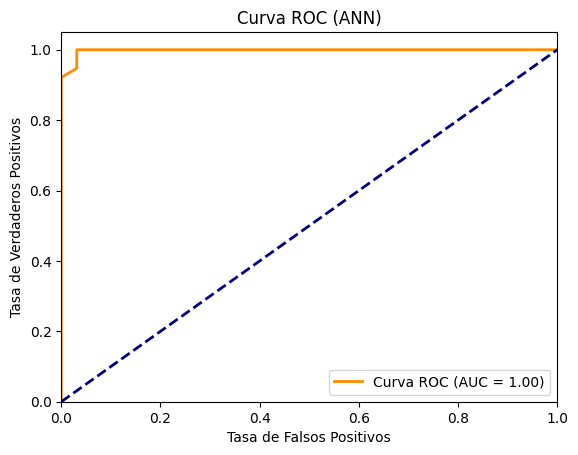

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Varaibles predictoras
X = df_encoded[['Departamento',"internet en colegio_Sí", "Aula en colegio para uso de computadoras_Sí",
                "Modalidad de Clases_Clases de laboratorios",'Modalidad de Clases_Clases prácticas',
                'Incorporacion de TIC en aula_Casi siempre','Incorporacion de TIC en aula_Ocasionalmente',
                'Incorporacion de TIC en aula_Rara vez','Incorporacion de TIC en aula_Siempre',
                'Uso de tecnologias mejoro el aprendizaje_Sí']]

#Varaibles objetivo
y = df_encoded["impacto de inclusion digital_Alto"]

# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de las características para mejorar el rendimiento de la red neuronal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creacion de un modelo de red neuronal artificial (ANN)
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Capa de entrada con el número de características
    layers.Dense(64, activation='relu'),  # Capa oculta con 64 neuronas y función de activación ReLU
    layers.Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona y función de
                                           #activación sigmoide (para clasificación binaria)
])

# Compilacion del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento el modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2)

#Predicciones en el conjunto de prueba
y_prob_ann = model.predict(X_test_scaled)
y_pred_ann = (y_prob_ann > 0.5).astype(int)

# Calculo de métricas de evaluación
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
roc_auc_ann = roc_auc_score(y_test, y_prob_ann)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_ann)

# Impresion de las métricas
print("Accuracy (ANN):", accuracy_ann)
print("Precision (ANN):", precision_ann)
print("Recall (ANN):", recall_ann)
print("F1-score (ANN):", f1_ann)
print("AUC-ROC (ANN):", roc_auc_ann)

# Matriz de confusión
print("\nMatriz de Confusión:")
print(conf_matrix)

# Curva ROC
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_prob_ann)
plt.figure()
plt.plot(fpr_ann, tpr_ann, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (ANN)')
plt.legend(loc="lower right")
plt.show()

In [84]:
# Crear un DataFrame con las etiquetas reales (y_test) y las predicciones (y_pred)
y_pred_ann = y_pred_ann.flatten()
results_df = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred_ann})

# Mostrar el DataFrame con las etiquetas reales y predicciones
results_df.head(50)

,Real,Predicciones
638,1,1
754,1,1
271,0,0
140,0,0
456,0,0
487,1,1
247,1,1
413,1,1
348,0,0
467,0,0


Accuracy (Decision Tree): 0.9571428571428572
Precision (Decision Tree): 0.972972972972973
Recall (Decision Tree): 0.9473684210526315
F1-score (Decision Tree): 0.9599999999999999
AUC-ROC (Decision Tree): 0.9708059210526316

Matriz de Confusión:
[[31  1]
 [ 2 36]]


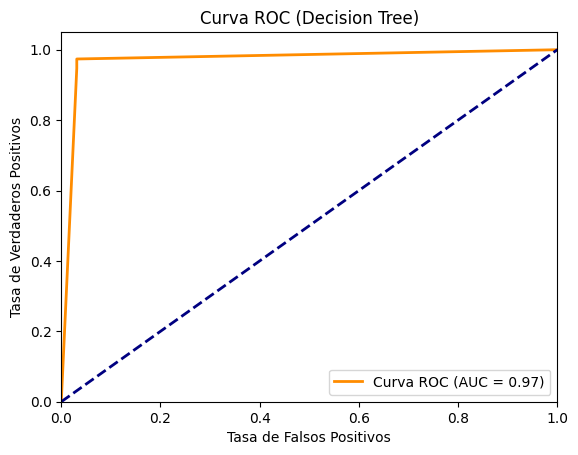

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Varaible predictora
X = df_encoded[['Departamento',"internet en colegio_Sí", "Aula en colegio para uso de computadoras_Sí",
                "Modalidad de Clases_Clases de laboratorios",'Modalidad de Clases_Clases prácticas',
                'Incorporacion de TIC en aula_Casi siempre','Incorporacion de TIC en aula_Ocasionalmente',
                'Incorporacion de TIC en aula_Rara vez','Incorporacion de TIC en aula_Siempre',
                'Uso de tecnologias mejoro el aprendizaje_Sí']]

#Varaible objetivo
y = df_encoded["impacto de inclusion digital_Alto"]

# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Árboles de Decisión
tree_model = DecisionTreeClassifier(random_state=42)

#Entrenamiento del modelo
tree_model.fit(X_train, y_train)

#Predicciones en el conjunto de prueba
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]
y_pred_tree = (y_prob_tree > 0.5).astype(int)

# Calculo de métricas de evaluación
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_tree)

# Impresion de las métricas
print("Accuracy (Decision Tree):", accuracy_tree)
print("Precision (Decision Tree):", precision_tree)
print("Recall (Decision Tree):", recall_tree)
print("F1-score (Decision Tree):", f1_tree)
print("AUC-ROC (Decision Tree):", roc_auc_tree)

# Matriz de confusión
print("\nMatriz de Confusión:")
print(conf_matrix)

# Curva ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_prob_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

In [86]:
# Crear un DataFrame con las etiquetas reales (y_test) y las predicciones (y_pred)
results_df = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred_tree})

# Mostrar el DataFrame con las etiquetas reales y predicciones
results_df.head()

,Real,Predicciones
638,1,1
754,1,1
271,0,0
140,0,0
456,0,0


In [87]:
import joblib
# Guardar el modelo y el scaler con Joblib
joblib.dump(model, "modelo_entrenado.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [88]:
import joblib

# Guardar el modelo
joblib.dump(tree_model, 'Modelo1.pkl')


['Modelo1.pkl']

Epoch 1/100
7/7 [==============================] - 1s 42ms/step - loss: 1.1017 - accuracy: 0.7636 - val_loss: 0.4619 - val_accuracy: 0.8393
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.3927 - accuracy: 0.8818 - val_loss: 0.2882 - val_accuracy: 0.9107
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5526 - accuracy: 0.9182 - val_loss: 0.2048 - val_accuracy: 0.9464
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2916 - accuracy: 0.9227 - val_loss: 0.1626 - val_accuracy: 0.9464
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1638 - accuracy: 0.9318 - val_loss: 0.1584 - val_accuracy: 0.9464
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.3686 - accuracy: 0.9318 - val_loss: 0.1561 - val_accuracy: 0.9464
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1506 - accuracy: 0.9455 - val_loss: 0.1529 - val_accuracy: 0.9464
Epoch 8/100
7/7 [=======

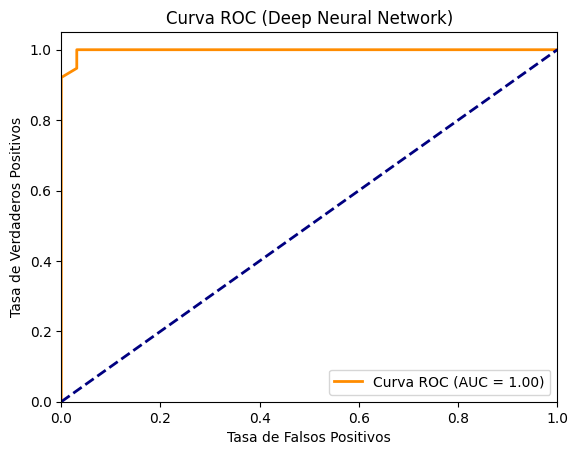

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Varaible predictora
X = df_encoded[['Departamento',"internet en colegio_Sí", "Aula en colegio para uso de computadoras_Sí",
                "Modalidad de Clases_Clases de laboratorios",'Modalidad de Clases_Clases prácticas',
                'Incorporacion de TIC en aula_Casi siempre','Incorporacion de TIC en aula_Ocasionalmente',
                'Incorporacion de TIC en aula_Rara vez','Incorporacion de TIC en aula_Siempre',
                'Uso de tecnologias mejoro el aprendizaje_Sí',]]

#Variable objetivo
y = df_encoded["impacto de inclusion digital_Alto"]

# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de las características para normalizarlas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creacion de un modelo de red neuronal profunda (DNN)
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='tanh')
])

# Compilacion del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

#Predicciones en el conjunto de prueba
y_prob_dnn = model.predict(X_test_scaled)
y_pred_dnn = (y_prob_dnn > 0.5).astype(int)

# Calculo de métricas de evaluación
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
precision_dnn = precision_score(y_test, y_pred_dnn)
recall_dnn = recall_score(y_test, y_pred_dnn)
f1_dnn = f1_score(y_test, y_pred_dnn)
roc_auc_dnn = roc_auc_score(y_test, y_prob_dnn)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_dnn)

# Impresion de las métricas
print("Accuracy (Deep Neural Network):", accuracy_dnn)
print("Precision (Deep Neural Network):", precision_dnn)
print("Recall (Deep Neural Network):", recall_dnn)
print("F1-score (Deep Neural Network):", f1_dnn)
print("AUC-ROC (Deep Neural Network):", roc_auc_dnn)

# Matriz de confusión
print("\nMatriz de Confusión:")
print(conf_matrix)

# Curva ROC
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(y_test, y_prob_dnn)
plt.figure()
plt.plot(fpr_dnn, tpr_dnn, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_dnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Deep Neural Network)')
plt.legend(loc="lower right")
plt.show()

In [90]:
# Crear un DataFrame con las etiquetas reales (y_test) y las predicciones (y_pred)
y_pred_dnn = y_pred_dnn.flatten()
results_df = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred_dnn})

# Mostrar el DataFrame con las etiquetas reales y predicciones
results_df.head()

,Real,Predicciones
638,1,1
754,1,1
271,0,0
140,0,0
456,0,0


In [91]:
#Caragar modelo ya entrenado.
import os
import joblib

#cargar el modelo y el scaler desde los archivos
modelo_cargado = joblib.load("modelo_entrenado.joblib")
scaler_cargado = joblib.load("scaler.joblib")


In [92]:
df_nuevo = pd.read_excel('/content/drive/MyDrive/dataset4.xlsx')
df_nuevo

,Departamento,internet en colegio_Sí,Aula en colegio para uso de computadoras_Sí,Modalidad de Clases_Clases de laboratorios,Modalidad de Clases_Clases prácticas,Incorporacion de TIC en aula_Casi siempre,Incorporacion de TIC en aula_Ocasionalmente,Incorporacion de TIC en aula_Rara vez,Incorporacion de TIC en aula_Siempre,Uso de tecnologias mejoro el aprendizaje_Sí
0,1,1,1,0,1,1,0,0,0,1
1,4,1,1,0,1,0,0,1,0,1
2,9,1,1,0,1,0,1,0,0,1
3,9,1,1,0,1,0,0,0,1,1
4,3,1,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
77,3,0,1,0,1,0,1,0,0,1
78,7,1,1,0,1,0,1,0,0,1
79,7,0,1,0,1,0,1,0,0,1
80,7,1,1,0,0,0,0,0,1,1


In [93]:
print("Características de entrenamiento:", X_train.columns)
print("Características de df_nuevo:", df_nuevo.columns)

Características de entrenamiento: Index(['Departamento', 'internet en colegio_Sí',
       'Aula en colegio para uso de computadoras_Sí',
       'Modalidad de Clases_Clases de laboratorios',
       'Modalidad de Clases_Clases prácticas',
       'Incorporacion de TIC en aula_Casi siempre',
       'Incorporacion de TIC en aula_Ocasionalmente',
       'Incorporacion de TIC en aula_Rara vez',
       'Incorporacion de TIC en aula_Siempre',
       'Uso de tecnologias mejoro el aprendizaje_Sí'],
      dtype='object')
Características de df_nuevo: Index(['Departamento', 'internet en colegio_Sí',
       'Aula en colegio para uso de computadoras_Sí',
       'Modalidad de Clases_Clases de laboratorios',
       'Modalidad de Clases_Clases prácticas',
       'Incorporacion de TIC en aula_Casi siempre',
       'Incorporacion de TIC en aula_Ocasionalmente',
       'Incorporacion de TIC en aula_Rara vez',
       'Incorporacion de TIC en aula_Siempre',
       'Uso de tecnologias mejoro el aprendizaje_Sí'

In [94]:
df_nuevo = df_nuevo[X_train.columns]

In [95]:
nuevos_datos_scaled = scaler_cargado.transform(df_nuevo)

In [96]:
# Hacer predicciones con el modelo cargado
y_prob_nuevos = modelo_cargado.predict(nuevos_datos_scaled)
y_pred_nuevos = (y_prob_nuevos > 0.5).astype(int)

3/3 [==============================] - 0s 4ms/step


In [97]:
df_nuevo.insert(0,'Prediccion',y_pred_nuevos,allow_duplicates=False)
df_nuevo

,Prediccion,Departamento,internet en colegio_Sí,Aula en colegio para uso de computadoras_Sí,Modalidad de Clases_Clases de laboratorios,Modalidad de Clases_Clases prácticas,Incorporacion de TIC en aula_Casi siempre,Incorporacion de TIC en aula_Ocasionalmente,Incorporacion de TIC en aula_Rara vez,Incorporacion de TIC en aula_Siempre,Uso de tecnologias mejoro el aprendizaje_Sí
0,1,1,1,1,0,1,1,0,0,0,1
1,1,4,1,1,0,1,0,0,1,0,1
2,1,9,1,1,0,1,0,1,0,0,1
3,1,9,1,1,0,1,0,0,0,1,1
4,1,3,1,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
77,0,3,0,1,0,1,0,1,0,0,1
78,1,7,1,1,0,1,0,1,0,0,1
79,0,7,0,1,0,1,0,1,0,0,1
80,1,7,1,1,0,0,0,0,0,1,1


In [98]:
# Crear un diccionario de mapeo de departamentos a valores numéricos
mapeo_departamentos = {
    1: 'Pando',
    2: 'Beni',
    3: 'La Paz',
    4: 'Oruro',
    5: 'Potosí',
    6: 'Cochabamba',
    7: 'Chuquisaca',
    8: 'Tarija',
    9: 'Santa Cruz'
}

# Reemplazar los valores en la columna 'Departamento'
df_nuevo['Departamento'] = df_nuevo['Departamento'].replace(mapeo_departamentos)

In [99]:
df_nuevo

,Prediccion,Departamento,internet en colegio_Sí,Aula en colegio para uso de computadoras_Sí,Modalidad de Clases_Clases de laboratorios,Modalidad de Clases_Clases prácticas,Incorporacion de TIC en aula_Casi siempre,Incorporacion de TIC en aula_Ocasionalmente,Incorporacion de TIC en aula_Rara vez,Incorporacion de TIC en aula_Siempre,Uso de tecnologias mejoro el aprendizaje_Sí
0,1,Pando,1,1,0,1,1,0,0,0,1
1,1,Oruro,1,1,0,1,0,0,1,0,1
2,1,Santa Cruz,1,1,0,1,0,1,0,0,1
3,1,Santa Cruz,1,1,0,1,0,0,0,1,1
4,1,La Paz,1,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
77,0,La Paz,0,1,0,1,0,1,0,0,1
78,1,Chuquisaca,1,1,0,1,0,1,0,0,1
79,0,Chuquisaca,0,1,0,1,0,1,0,0,1
80,1,Chuquisaca,1,1,0,0,0,0,0,1,1


In [100]:
# prompt: exportar df_nuevo  en formato de excel

df_nuevo.to_excel('resultado_prediccion.xlsx')
